###1. Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

In [3]:
df.head(10)

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
5,12/25/2019 02:00:00 PM,Brooklyn Bridge,3171,1685,1486,clear-day,44.0,0.0000,40.708164,-73.999509,Christmas Day,"(40.7081639691088, -73.9995087014816)"
6,01/27/2019 09:00:00 PM,Brooklyn Bridge,13,5,8,partly-cloudy-night,41.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
7,02/07/2019 04:00:00 AM,Brooklyn Bridge,0,0,0,cloudy,39.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
8,01/03/2019 09:00:00 PM,Brooklyn Bridge,9,7,2,partly-cloudy-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
9,08/13/2019 09:00:00 AM,Brooklyn Bridge,520,281,239,partly-cloudy-day,76.0,0.0087,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hour_beginning     16057 non-null  object 
 1   location           16057 non-null  object 
 2   Pedestrians        16057 non-null  int64  
 3   Towards Manhattan  16057 non-null  int64  
 4   Towards Brooklyn   16057 non-null  int64  
 5   weather_summary    16041 non-null  object 
 6   temperature        16041 non-null  float64
 7   precipitation      16041 non-null  float64
 8   lat                16057 non-null  float64
 9   long               16057 non-null  float64
 10  events             1124 non-null   object 
 11  Location1          16057 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 1.5+ MB


In [5]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df.info()

<ipython-input-5-b642f4e9e1ed>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hour_beginning     16057 non-null  datetime64[ns]
 1   location           16057 non-null  object        
 2   Pedestrians        16057 non-null  int64         
 3   Towards Manhattan  16057 non-null  int64         
 4   Towards Brooklyn   16057 non-null  int64         
 5   weather_summary    16041 non-null  object        
 6   temperature        16041 non-null  float64       
 7   precipitation      16041 non-null  float64       
 8   lat                16057 non-null  float64       
 9   long               16057 non-null  float64       
 10  events             1124 non-null   object        
 11  Location1          16057 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 1.5+ MB


In [6]:
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [7]:
df['hour'] = df['hour_beginning'].dt.hour
df['month'] = df['hour_beginning'].dt.month
df['date'] = df['hour_beginning'].dt.date
df['day_name'] = df['hour_beginning'].dt.day_name()

df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,4,2019-04-30,Tuesday
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",22,12,2019-12-31,Tuesday
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",23,12,2019-12-31,Tuesday
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",21,12,2019-12-31,Tuesday
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,4,2019-04-01,Monday


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hour_beginning     16057 non-null  datetime64[ns]
 1   location           16057 non-null  object        
 2   Pedestrians        16057 non-null  int64         
 3   Towards Manhattan  16057 non-null  int64         
 4   Towards Brooklyn   16057 non-null  int64         
 5   weather_summary    16041 non-null  object        
 6   temperature        16041 non-null  float64       
 7   precipitation      16041 non-null  float64       
 8   lat                16057 non-null  float64       
 9   long               16057 non-null  float64       
 10  events             1124 non-null   object        
 11  Location1          16057 non-null  object        
 12  hour               16057 non-null  int32         
 13  month              16057 non-null  int32         
 14  date  

###Cleaning


In [9]:
# get beginning and end of date range
min_dt = df.hour_beginning.min()
max_dt = df.hour_beginning.max()
print(min_dt)
print(max_dt)

2017-10-01 00:00:00
2019-12-31 23:00:00


In [10]:
expected_range = pd.date_range(start = min_dt, end = max_dt, freq='H' )
expected_range
# then identify the missing hours
missing_hours = expected_range.difference(df['hour_beginning'])
print(missing_hours)

DatetimeIndex(['2018-08-01 00:00:00', '2018-08-01 01:00:00',
               '2018-08-01 02:00:00', '2018-08-01 03:00:00',
               '2018-08-01 04:00:00', '2018-08-01 05:00:00',
               '2018-08-01 06:00:00', '2018-08-01 07:00:00',
               '2018-08-01 08:00:00', '2018-08-01 09:00:00',
               ...
               '2018-12-31 14:00:00', '2018-12-31 15:00:00',
               '2018-12-31 16:00:00', '2018-12-31 17:00:00',
               '2018-12-31 18:00:00', '2018-12-31 19:00:00',
               '2018-12-31 20:00:00', '2018-12-31 21:00:00',
               '2018-12-31 22:00:00', '2018-12-31 23:00:00'],
              dtype='datetime64[ns]', length=3672, freq='h')


<ipython-input-10-2144d3c53e57>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  expected_range = pd.date_range(start = min_dt, end = max_dt, freq='H' )


In [11]:
# get beginning and end of date range
min_dt = df.hour_beginning.min()
max_dt = df.hour_beginning.max()
print(min_dt)
print(max_dt)

2017-10-01 00:00:00
2019-12-31 23:00:00


In [12]:
df = df.sort_values(by='hour_beginning') #Arranging data in chronological order first and then proceeding to forward/back fill
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
8846,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,10,2017-10-01,Sunday
9473,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,10,2017-10-01,Sunday
10098,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,10,2017-10-01,Sunday
10733,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,10,2017-10-01,Sunday
11527,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,10,2017-10-01,Sunday


In [13]:
df.reset_index(drop=True, inplace=True)  #drop=True discards the current index, inplace=True applies changes to the df
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
0,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,10,2017-10-01,Sunday
1,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,10,2017-10-01,Sunday
2,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,10,2017-10-01,Sunday
3,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,10,2017-10-01,Sunday
4,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,10,2017-10-01,Sunday


In [14]:
df['temperature'] = df['temperature'].fillna(method="ffill")
df['precipitation'] = df['precipitation'].fillna(method="ffill")
df['weather_summary'] = df['weather_summary'].fillna(method="ffill")

<ipython-input-14-32e6270e96e1>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['temperature'] = df['temperature'].fillna(method="ffill")
<ipython-input-14-32e6270e96e1>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['precipitation'] = df['precipitation'].fillna(method="ffill")
<ipython-input-14-32e6270e96e1>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['weather_summary'] = df['weather_summary'].fillna(method="ffill")


In [15]:
# Sanity Check
df.isnull().sum()

,0
hour_beginning,0
location,0
Pedestrians,0
Towards Manhattan,0
Towards Brooklyn,0
weather_summary,0
temperature,0
precipitation,0
lat,0
long,0


In [16]:
df_weekdays = df[~df['day_name'].isin(['Saturday','Sunday'])]

In [17]:
# Sanity Check
df_weekdays['day_name'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype=object)

In [18]:
pedestrian_counts_by_day = df_weekdays.groupby('day_name')['Pedestrians'].sum()
pedestrian_counts_by_day

,Pedestrians
day_name,
Friday,1588068
Monday,1481435
Thursday,1370880
Tuesday,1394963
Wednesday,1310900


In [19]:
pedestrian_counts_by_day = pedestrian_counts_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
pedestrian_counts_by_day

,Pedestrians
day_name,
Monday,1481435
Tuesday,1394963
Wednesday,1310900
Thursday,1370880
Friday,1588068


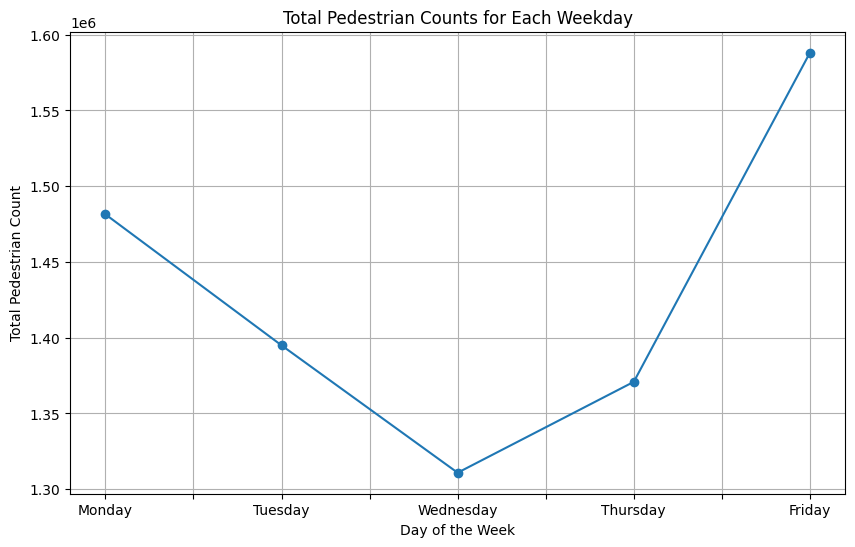

In [20]:
plt.figure(figsize=(10, 6))
pedestrian_counts_by_day.plot(kind='line', marker='o')
plt.title('Total Pedestrian Counts for Each Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Total Pedestrian Count')
plt.grid(True)
plt.show()

###2. Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix)between weather patterns and pedestrian counts for the selected year.

In [21]:
df['year'] = df['hour_beginning'].dt.year
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name,year
0,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,10,2017-10-01,Sunday,2017
1,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,10,2017-10-01,Sunday,2017
2,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,10,2017-10-01,Sunday,2017
3,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,10,2017-10-01,Sunday,2017
4,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,10,2017-10-01,Sunday,2017


In [22]:
df_2019 =df[df['year'] == 2019]

In [23]:
df_2019

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name,year
7296,2019-01-01 00:00:00,Brooklyn Bridge,144,24,120,rain,46.0,0.1363,40.708164,-73.999509,New Year's Day,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-01,Tuesday,2019
7297,2019-01-01 01:00:00,Brooklyn Bridge,39,20,19,rain,47.0,0.0490,40.708164,-73.999509,New Year's Day,"(40.7081639691088, -73.9995087014816)",1,1,2019-01-01,Tuesday,2019
7298,2019-01-01 02:00:00,Brooklyn Bridge,15,10,5,rain,47.0,0.0279,40.708164,-73.999509,New Year's Day,"(40.7081639691088, -73.9995087014816)",2,1,2019-01-01,Tuesday,2019
7299,2019-01-01 03:00:00,Brooklyn Bridge,14,10,4,cloudy,48.0,0.0044,40.708164,-73.999509,New Year's Day,"(40.7081639691088, -73.9995087014816)",3,1,2019-01-01,Tuesday,2019
7300,2019-01-01 04:00:00,Brooklyn Bridge,8,6,2,cloudy,50.0,0.0003,40.708164,-73.999509,New Year's Day,"(40.7081639691088, -73.9995087014816)",4,1,2019-01-01,Tuesday,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16052,2019-12-31 19:00:00,Brooklyn Bridge,11,9,2,cloudy,43.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",19,12,2019-12-31,Tuesday,2019
16053,2019-12-31 20:00:00,Brooklyn Bridge,15,14,1,cloudy,43.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",20,12,2019-12-31,Tuesday,2019
16054,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",21,12,2019-12-31,Tuesday,2019
16055,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",22,12,2019-12-31,Tuesday,2019


In [24]:
df['year'].unique()

array([2017, 2018, 2019], dtype=int32)

In [25]:
df.groupby('year').size()

,0
year,
2017,2208
2018,5088
2019,8761


In [26]:
# One hot encoding on weather summary
df_2019_encoded = pd.get_dummies(df_2019[['Pedestrians', 'weather_summary']], columns=['weather_summary'])

In [27]:
df_2019_encoded

,Pedestrians,weather_summary_clear-day,weather_summary_clear-night,weather_summary_cloudy,weather_summary_fog,weather_summary_partly-cloudy-day,weather_summary_partly-cloudy-night,weather_summary_rain,weather_summary_sleet,weather_summary_snow,weather_summary_wind
7296,144,False,False,False,False,False,False,True,False,False,False
7297,39,False,False,False,False,False,False,True,False,False,False
7298,15,False,False,False,False,False,False,True,False,False,False
7299,14,False,False,True,False,False,False,False,False,False,False
7300,8,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16052,11,False,False,True,False,False,False,False,False,False,False
16053,15,False,False,True,False,False,False,False,False,False,False
16054,12,False,False,True,False,False,False,False,False,False,False
16055,10,False,False,True,False,False,False,False,False,False,False


In [28]:
corr_matrix = df_2019_encoded.corr()

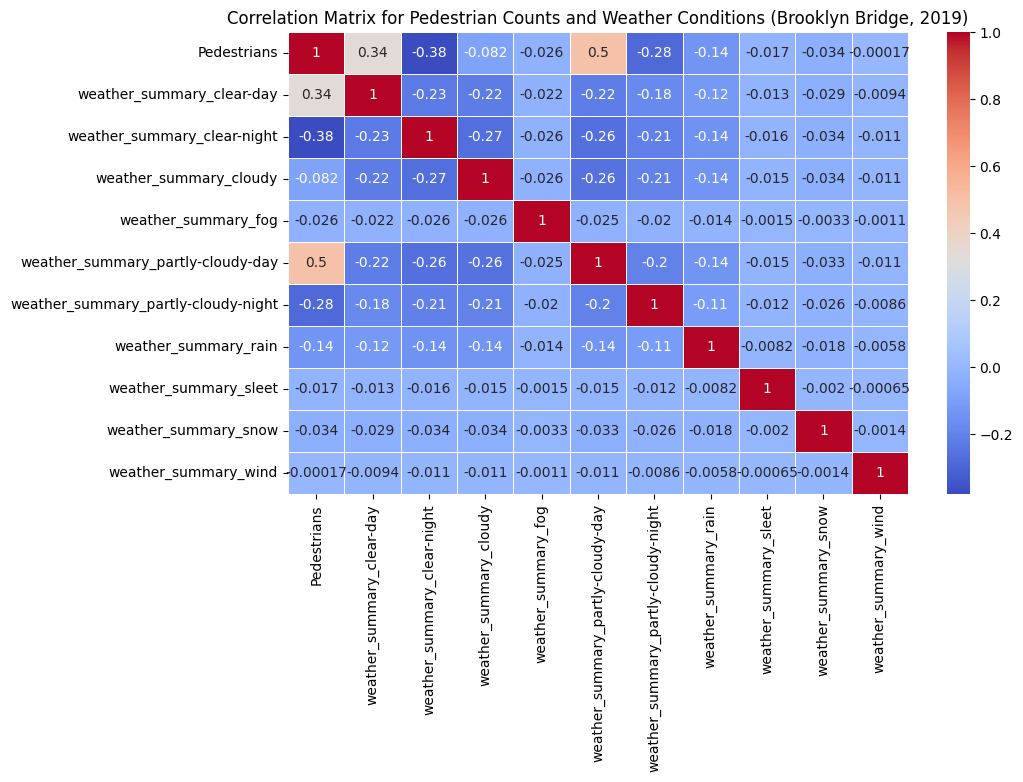

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix for Pedestrian Counts and Weather Conditions (Brooklyn Bridge, 2019)")
plt.show()

**Observations:**

* Clear days also have a positive correlation (0.34) with pedestrian counts.

* Partly cloudy days have the highest positive correlation with pedestrian counts (0.5), indicating that more people tend to walk on Brooklyn Bridge on partly cloudy days.
* Clear days comes next. It also has a positive correlation (0.34) with pedestrian counts.

* Cloudy and clear nights show a negative correlation, meaning fewer pedestrians are counted during these weather conditions.
* Rain, snow, and sleet are negatively correlated with pedestrian counts, which suggests that poor weather conditions discourage pedestrian activity just as expected.





**Note:**  

The correlation matrix might is not the best tool for understanding relationships between categorical variables (weather conditions) and numerical values (pedestrian counts) because it measures linear relationships between numerical variables, and categorical variables don't inherently have a meaningful linear structure.

---

**Alternate Method**:  

*Box Plots*: These can visually display the distribution of the numerical variable (pedestrian counts) across different categories (weather conditions).

In [30]:
df_2019_filtered = df_2019[['Pedestrians', 'weather_summary']]

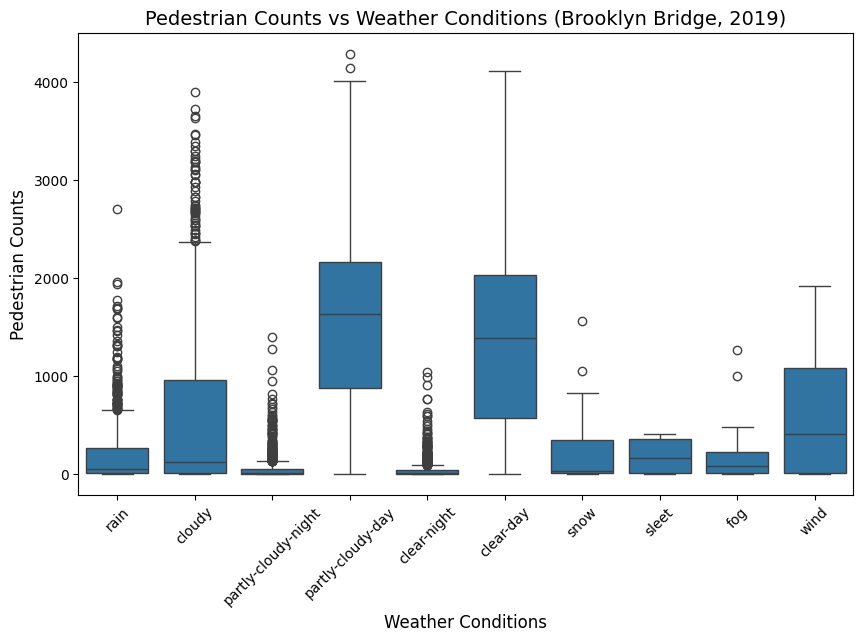

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_summary', y='Pedestrians', data=df_2019_filtered)
plt.title('Pedestrian Counts vs Weather Conditions (Brooklyn Bridge, 2019)', fontsize=14)
plt.xlabel('Weather Conditions', fontsize=12)
plt.ylabel('Pedestrian Counts', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Insights:**  

*   Clear days and partly cloudy days tend to have higher pedestrian counts with wider distributions, suggesting more activity during these weather conditions.
*   Rain, snow, and fog tend to correspond with lower pedestrian counts, as seen in the more condensed boxes near the lower pedestrian count range.
*   Clear nights and partly cloudy nights show lower pedestrian activity, as expected with very few high pedestrian counts.
*   Windy conditions also have a relatively moderate pedestrian count but show more variation.




###3. Implement a custom function to categorize time of day into morning,afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day

In [32]:
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name,year
0,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,10,2017-10-01,Sunday,2017
1,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,10,2017-10-01,Sunday,2017
2,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,10,2017-10-01,Sunday,2017
3,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,10,2017-10-01,Sunday,2017
4,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,10,2017-10-01,Sunday,2017


In [33]:
# Function to categorize time of the day
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [34]:
df['time_of_day'] = df['hour'].apply(categorize_time)
df.head(10)

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name,year,time_of_day
0,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,10,2017-10-01,Sunday,2017,Night
1,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,10,2017-10-01,Sunday,2017,Night
2,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,10,2017-10-01,Sunday,2017,Night
3,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,10,2017-10-01,Sunday,2017,Night
4,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,10,2017-10-01,Sunday,2017,Night
5,2017-10-01 05:00:00,Brooklyn Bridge,16,12,4,partly-cloudy-night,50.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",5,10,2017-10-01,Sunday,2017,Morning
6,2017-10-01 06:00:00,Brooklyn Bridge,113,88,25,partly-cloudy-night,49.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",6,10,2017-10-01,Sunday,2017,Morning
7,2017-10-01 07:00:00,Brooklyn Bridge,199,72,127,clear-day,49.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",7,10,2017-10-01,Sunday,2017,Morning
8,2017-10-01 08:00:00,Brooklyn Bridge,261,133,128,clear-day,50.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",8,10,2017-10-01,Sunday,2017,Morning
9,2017-10-01 09:00:00,Brooklyn Bridge,845,504,341,clear-day,54.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",9,10,2017-10-01,Sunday,2017,Morning


In [35]:
pedestrian_count_by_time = df.groupby('time_of_day')['Pedestrians'].sum()
pedestrian_count_by_time

,Pedestrians
time_of_day,
Afternoon,5852025
Evening,2432145
Morning,2480582
Night,268114


In [36]:
time_of_day_order = ['Morning', 'Afternoon', 'Evening', 'Night']
pedestrian_count_by_time = pedestrian_count_by_time.reindex(time_of_day_order)
pedestrian_count_by_time

,Pedestrians
time_of_day,
Morning,2480582
Afternoon,5852025
Evening,2432145
Night,268114


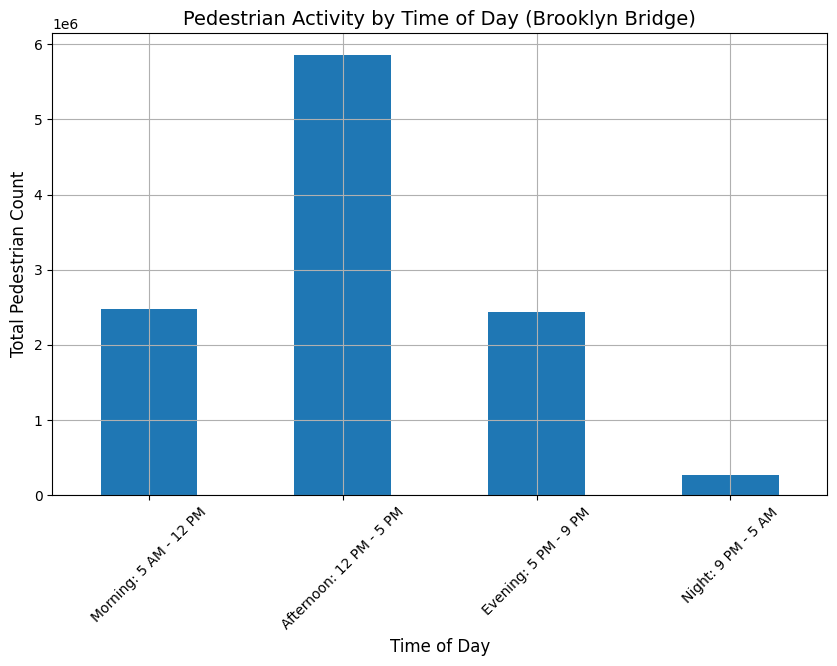

In [37]:
time_of_day_labels = ['Morning: 5 AM - 12 PM', 'Afternoon: 12 PM - 5 PM', 'Evening: 5 PM - 9 PM', 'Night: 9 PM - 5 AM']

plt.figure(figsize=(10, 6))
pedestrian_count_by_time.plot(kind='bar')
plt.title('Pedestrian Activity by Time of Day (Brooklyn Bridge)', fontsize=14)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Total Pedestrian Count', fontsize=12)
plt.xticks(ticks=range(len(time_of_day_labels)), labels=time_of_day_labels, rotation=45)
plt.grid(True)
plt.show()

**Observations:**  
Afternoon has the highest pedestrian activity on Brooklyn Bridge, followed by morning and then evening. Night time has very little activity as expected.
